In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

plt.style.use("ggplot")

from src.alternatingLeastSquares import ALS
from src.gradientDescent import gradientDescent
from src.cost_functions import get_Jsim_and_DJsim

from src.aux_functions import initializeQ, initializeP

from src.plottingFunctions import plotALSResults


In [2]:
rnames = ["user_id", "movie_id", "rating", "timestamp"]
movies = pd.read_table(
    "ml-1m/ratings.dat", sep="::", header=None, names=rnames, engine="python"
)
movies = pd.pivot_table(movies, values="rating", index="user_id", columns="movie_id")
print(movies.shape)
movies.head()

(6040, 3706)


movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
R = movies.to_numpy()
print(f"{round((np.count_nonzero(~np.isnan(R))/R.size)*100,2)}% of full entries")


4.47% of full entries


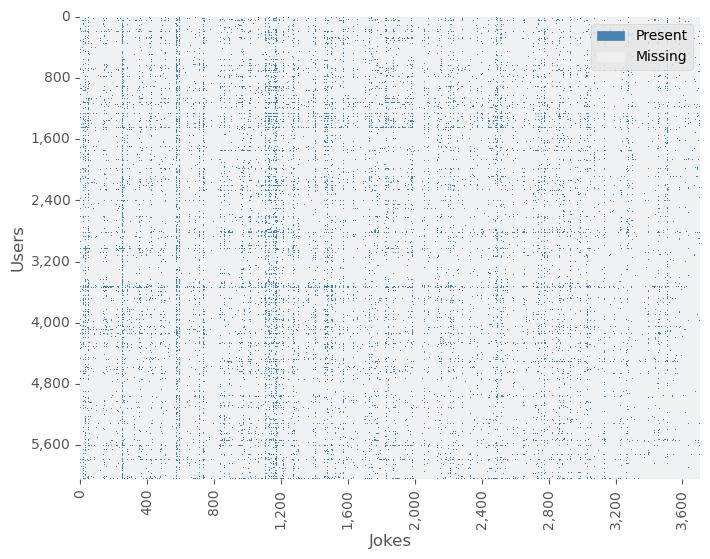

In [4]:
# Create DataFrame with some missing values
df = movies
# Create a boolean mask for missing values
missing = df.notna()

# Create colormap
cmap = sns.light_palette("steelblue", as_cmap=True)

# Set figure size
plt.figure(figsize=(8, 6))  # width, height in inches

# Use Seaborn to visualize missingness
sns.heatmap(missing, cbar=False, cmap=cmap)

# Create legend
missing_patch = mpatches.Patch(color=cmap(0.99), label="Present")
not_missing_patch = mpatches.Patch(color=cmap(1), label="Missing")
plt.legend(handles=[missing_patch, not_missing_patch], loc="upper right")

# Add labels
plt.xlabel("Jokes")
plt.ylabel("Users")

# Format y-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Limit the number of ticks on the y-axis
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(10))
plt.gca().yaxis.set_major_formatter(formatter)

# Limit the number of ticks on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()


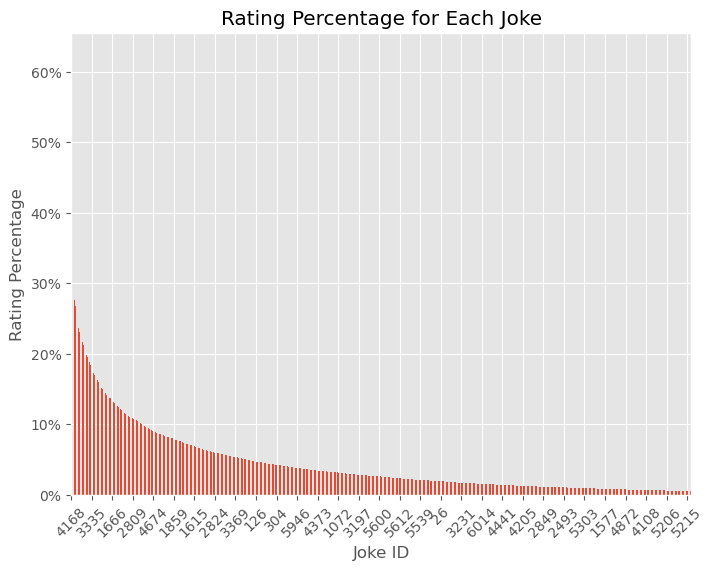

In [5]:
df = pd.DataFrame(R)
rating_percentage = df.count(axis=1) / len(df.columns)

# Sort jokes by rating percentage in descending order
rating_percentage_sorted = rating_percentage.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
rating_percentage_sorted.plot(kind="bar")
plt.ylabel("Rating Percentage")
plt.xlabel("Joke ID")
plt.title("Rating Percentage for Each Joke")

# Modify x-ticks
n = 200  # Show every nth x-tick, adjust as needed
plt.xticks(
    range(0, len(rating_percentage_sorted), n),
    rating_percentage_sorted.index[::n],
    rotation=45,
)  # Rotate labels for better readability

# Modify y-ticks to show percentage
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1))

plt.show()


In [4]:
mean = np.nanmean(R)
std = np.nanstd(R)
print(mean)
print(std)
normR = (R - mean) / std

np.random.seed(43)
f = 10
alternations = 10
tol = 1e-2
max_iter = 10
lambQ = 0
lambP = lambQ

als_result = ALS(
    normR,
    f,
    alternations=alternations,
    tol=tol,
    max_iter=max_iter,
    lambQ=lambQ,
    lambP=lambP,
)

3.581564453029317
1.1171012869389085
 Optimizing Q
Time to calculate alpha: 8.924907684326172. Alpha: 0.001953125
Time to calculate alpha: 9.637166261672974. Alpha: 0.0009765625
Time to calculate alpha: 10.349188804626465. Alpha: 0.00048828125
Time to calculate alpha: 8.761430740356445. Alpha: 0.001953125
Time to calculate alpha: 10.256907224655151. Alpha: 0.00048828125
Time to calculate alpha: 8.727467775344849. Alpha: 0.001953125
Time to calculate alpha: 10.267544746398926. Alpha: 0.00048828125
Time to calculate alpha: 9.564652442932129. Alpha: 0.0009765625
Time to calculate alpha: 10.361522912979126. Alpha: 0.00048828125
Time to calculate alpha: 8.732603788375854. Alpha: 0.001953125
 Oprimizing P
Time to calculate alpha: 7.12593936920166. Alpha: 0.0078125
Time to calculate alpha: 8.125593185424805. Alpha: 0.00390625
Time to calculate alpha: 8.732739210128784. Alpha: 0.001953125
Time to calculate alpha: 7.021819829940796. Alpha: 0.0078125
Time to calculate alpha: 8.90816330909729. Al

In [5]:
Ju_values = als_result["Ju_values"]
Ja_values = als_result["Ja_values"]
RMSEu_values = als_result["RMSEu_values"]
RMSEa_values = als_result["RMSEa_values"]
newQ = als_result["Q"]
newP = als_result["P"]


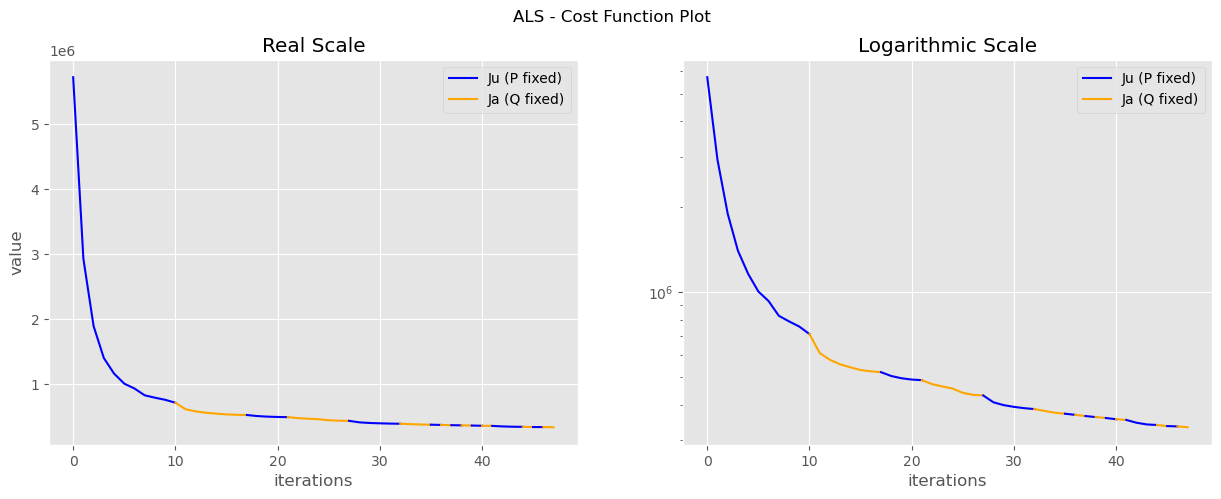

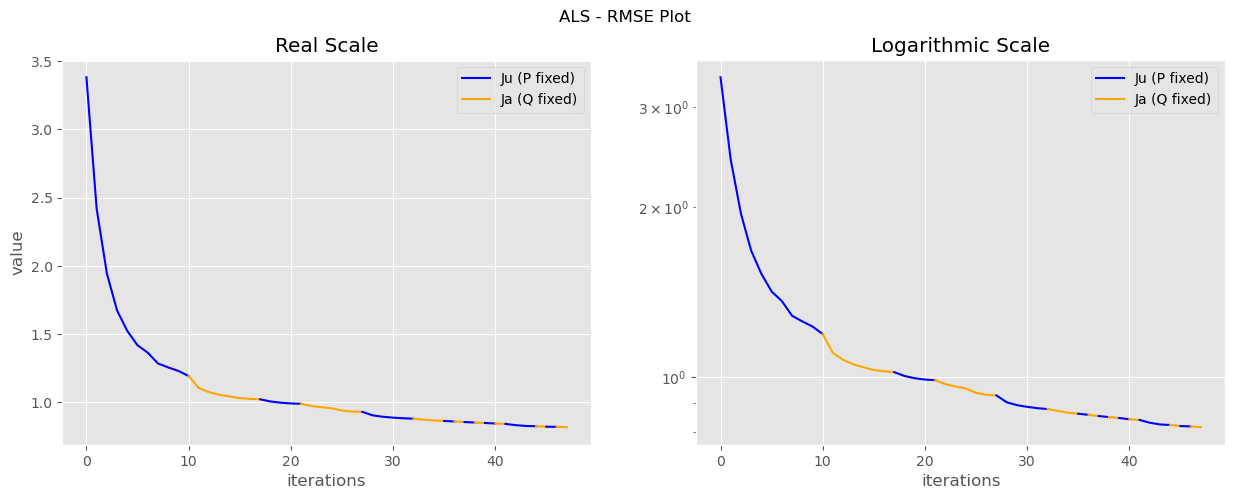

In [6]:
plotALSResults(Ju_values, Ja_values, "ALS - Cost Function Plot")
plotALSResults(RMSEu_values, RMSEa_values, "ALS - RMSE Plot")

In [4]:
mean = np.nanmean(R)
std = np.nanstd(R)
print(f"Global mean of matrix R: {mean}")
print(f" Global standard deviation of matrix R: {std}")
normR = (R - mean) / std

# Seed
np.random.seed(43)

f = 500
tol = 1e-5
max_iter = 1000

Jsim, DJsim = get_Jsim_and_DJsim(normR, f)

# Q and P initilization
Q = initializeQ(R.shape[0], f)
P = initializeP(R.shape[1], f)

Theta = np.concatenate((Q.flatten(), P.flatten()))

gradientDescentResults = gradientDescent(
    Jsim, Theta, DJsim, tol, max_iter, alpha0=0.0001
)
newThetas = gradientDescentResults["x_values"]
J_values = gradientDescentResults["func_values"]
newQs = gradientDescentResults["x_values"]


3.581564453029317
1.1171012869389085
Iteration    0: Cost 158128858.92   
Iteration  100: Cost 447661.16   
Iteration  200: Cost 174254.18   
Iteration  300: Cost 119615.38   
Iteration  400: Cost 98509.41   
Iteration  500: Cost 87149.00   
Iteration  600: Cost 79699.47   
Iteration  700: Cost 74205.43   
Iteration  800: Cost 69862.51   
Iteration  900: Cost 66281.07   
Iteration  999: Cost 63272.52   


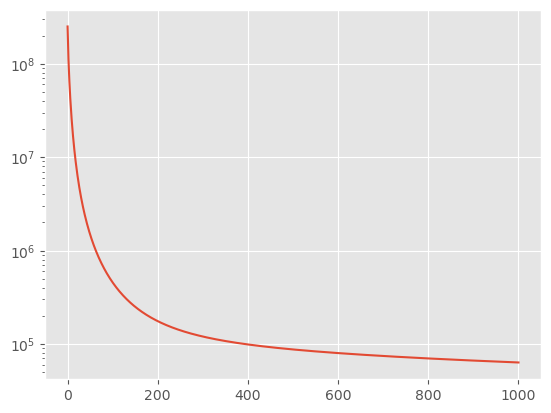

In [9]:
plt.plot(J_values)
plt.yscale("log")


In [18]:
m, n = R.shape
Q = newThetas[-1][: m * f].reshape(m, f)
P = newThetas[-1][m * f :].reshape(n, f)

In [27]:
np.min((Q @ P.T) * std + mean)
np.mean((Q @ P.T) * std + mean)
np.std((Q @ P.T) * std + mean)

19.90407110920024

In [26]:
mean

3.581564453029317

In [29]:
np.nanmin(R)

1.0

In [30]:
np.nanmax(R)

5.0